In [23]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [24]:
#fo = pd.read_csv('clean_File.csv') #read the data
df = pd.read_csv('data/text-preprocessing.csv') #create data frame
df = df.drop(columns=['Unnamed: 0'])
df.head()

,tweet_id,author_name,author_username,author_location,content,content_clean,like_count,retweet_count,reply_count,source,...,longitude,latitude,province,city,country,created_at,content_token,tweet_tokens_fdist,tweet_tokens_WSW,tweet_tokens_stemmed
0,153619597713608704,MariBerlomba,MariBerlomba,di dalam asa pemuda,"1. lomba poster ilmiah ""energi baru/terbarukan...",lomba poster ilmiah energi baruterbarukan dead...,0.0,1.0,NaN,Twitter for BlackBerry®,...,NaN,NaN,NaN,NaN,NaN,2012-01-01 23:32:20,"['lomba', 'poster', 'ilmiah', 'energi', 'barut...",<FreqDist with 11 samples and 11 outcomes>,"['lomba', 'poster', 'ilmiah', 'energi', 'barut...","['lomba', 'poster', 'ilmiah', 'energi', 'barut..."
1,153857491925610496,vegaaulia,vegaaulia,"Bogor, Indonesia",elaahhh ini si bapak tiba2 ngomong soal energi...,elaahhh ini si bapak tiba ngomong soal energi ...,0.0,NaN,1.0,Mobile Web,...,106.797242,-6.596299,Jawa Barat,Kelurahan Pabaton,Indonesia,2012-01-02 15:17:39,"['elaahhh', 'ini', 'si', 'bapak', 'tiba', 'ngo...",<FreqDist with 13 samples and 13 outcomes>,"['elaahhh', 'ngomong', 'energi', 'terbarukan',...","['elaahhh', 'ngomong', 'energi', 'baru', 'tv',..."
2,154361424154603520,enbater,enbater,Indonesia,masih banyak daerah terpencil membutuhkam list...,masih banyak daerah terpencil membutuhkam list...,0.0,NaN,NaN,MOTOBLUR,...,117.890285,-2.483383,Kalimantan Timur,NaN,Indonesia,2012-01-04 00:40:06,"['masih', 'banyak', 'daerah', 'terpencil', 'me...",<FreqDist with 13 samples and 13 outcomes>,"['daerah', 'terpencil', 'membutuhkam', 'listri...","['daerah', 'pencil', 'membutuhkam', 'listrik',..."
3,156397219346518017,imronrosidin,imronrosidin,"ÜT: -6.895087,107.627799",gw kira kalo @provocactive gak tertarik dgn ma...,gw kira kalo gak tertarik dgn materi energi ba...,0.0,NaN,1.0,UberSocial for BlackBerry,...,NaN,NaN,NaN,NaN,NaN,2012-01-09 15:29:37,"['gw', 'kira', 'kalo', 'gak', 'tertarik', 'dgn...",<FreqDist with 17 samples and 17 outcomes>,"['tertarik', 'materi', 'energi', 'baruterbaruk...","['tarik', 'materi', 'energi', 'baruterbarukan'..."
4,156936339718279168,revozone,revozone,Indonesia,satu lagi yang aneh. inget jatropa? alias miny...,satu lagi yang aneh inget jatropa alias minyak...,0.0,NaN,NaN,UberSocial for BlackBerry,...,117.890285,-2.483383,Kalimantan Timur,NaN,Indonesia,2012-01-11 03:11:53,"['satu', 'lagi', 'yang', 'aneh', 'inget', 'jat...",<FreqDist with 19 samples and 20 outcomes>,"['aneh', 'inget', 'jatropa', 'alias', 'minyak'...","['aneh', 'inget', 'jatropa', 'alias', 'minyak'..."


In [25]:
df.shape

(109705, 22)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109705 entries, 0 to 109704
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tweet_id              109705 non-null  int64  
 1   author_name           109705 non-null  object 
 2   author_username       109705 non-null  object 
 3   author_location       78272 non-null   object 
 4   content               109705 non-null  object 
 5   content_clean         109437 non-null  object 
 6   like_count            109604 non-null  float64
 7   retweet_count         17012 non-null   float64
 8   reply_count           16620 non-null   float64
 9   source                109705 non-null  object 
 10  keyword               109705 non-null  object 
 11  address               64928 non-null   object 
 12  longitude             66438 non-null   float64
 13  latitude              66438 non-null   float64
 14  province              64297 non-null   object 
 15  

In [27]:
df_new = df[df['content_clean'].notnull()]

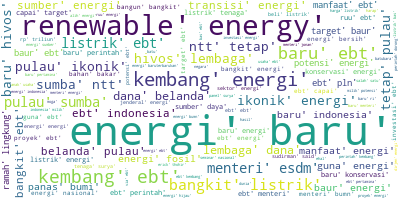

In [52]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_new['tweet_tokens_stemmed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [28]:
text = df_new['tweet_tokens_stemmed']
text_list =  [i.split() for i in text]
#text_list =  [i for i in text]
print(len(text_list))

109437


In [29]:
#https://sites.unpad.ac.id/widodo/2021/03/09/nlp-dengan-python/

In [30]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [31]:
print(len(text_list))

109437


In [32]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<19454 unique tokens: ["'baruterbarukan',", "'deadline',", "'ilmiah',", "'januari',", "'poster',"]...>


In [33]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

109437
[(76, 1), (342, 1)]


In [34]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

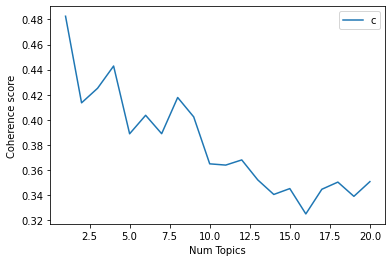

In [35]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [36]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 1  has Coherence Value of 0.483
Num Topics = 2  has Coherence Value of 0.414
Num Topics = 3  has Coherence Value of 0.425
Num Topics = 4  has Coherence Value of 0.443
Num Topics = 5  has Coherence Value of 0.389
Num Topics = 6  has Coherence Value of 0.404
Num Topics = 7  has Coherence Value of 0.389
Num Topics = 8  has Coherence Value of 0.418
Num Topics = 9  has Coherence Value of 0.402
Num Topics = 10  has Coherence Value of 0.365
Num Topics = 11  has Coherence Value of 0.364
Num Topics = 12  has Coherence Value of 0.368
Num Topics = 13  has Coherence Value of 0.352
Num Topics = 14  has Coherence Value of 0.34
Num Topics = 15  has Coherence Value of 0.345
Num Topics = 16  has Coherence Value of 0.325
Num Topics = 17  has Coherence Value of 0.345
Num Topics = 18  has Coherence Value of 0.35
Num Topics = 19  has Coherence Value of 0.339
Num Topics = 20  has Coherence Value of 0.351


In [37]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=9) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    # yg belum remove Yang, yg,trus lower text

Topic: 0 Word: 0.075*"['ebt'," + 0.014*"'erick',_'thohir'," + 0.014*"'ramah',_'lingkung']" + 0.013*"'ebt']" + 0.011*"'bumn'," + 0.009*"['plnid'," + 0.009*"'kembang'," + 0.008*"'erick'," + 0.008*"'tambah'," + 0.007*"'thohir',"
Topic: 1 Word: 0.063*"'transisi'," + 0.019*"'hijau'," + 0.014*"['pln'," + 0.014*"'rp'," + 0.013*"'beli',_'listrik'," + 0.012*"'pasang'," + 0.012*"'ebt']" + 0.012*"'rp',_'triliun'," + 0.011*"'beli'," + 0.011*"['moga',"
Topic: 2 Word: 0.022*"['menteri',_'esdm'," + 0.014*"['plnid',_'pln'," + 0.010*"'wujud'," + 0.010*"'ebt']" + 0.010*"['menteri'," + 0.008*"'pasok',_'listrik'," + 0.008*"'larang',_'ekspor'," + 0.008*"'cepat',_'transisi'," + 0.007*"'tambah',_'kapasitas'," + 0.007*"'renewable',_'energy',"
Topic: 3 Word: 0.027*"'ebt']" + 0.026*"'capai',_'target'," + 0.020*"'target'," + 0.018*"'baur'," + 0.016*"'panas',_'bumi'," + 0.015*"'bangun',_'bangkit'," + 0.013*"'kejar',_'target'," + 0.013*"'capai'," + 0.013*"['sobat'," + 0.011*"'bangkit',"
Topic: 4 Word: 0.038*"'ment

In [38]:
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 5)]) #ubah2 yg ini
df=pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words_topic_20.csv")
#df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2_50_clean.csv")
print(df)


None


In [39]:
#ini dilakukan jika module belum tersedia
!pip install pyLDAvis
#!apt-get -qq install -y pyLDAvis


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [42]:
import pyLDAvis
import pyLDAvis.gensim_models;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim_models.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'data/lda-gensim_clean_kualitatif1.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.076310  0.056043       1        1  15.974244
8      0.183606  0.035403       2        1  15.581471
3      0.200452  0.034800       3        1  12.449703
0      0.155711  0.034451       4        1  11.705340
6     -0.037214 -0.346975       5        1  11.030906
7     -0.243054  0.040961       6        1   8.791748
5     -0.184078  0.134655       7        1   8.561195
4     -0.078923  0.083478       8        1   8.277270
1     -0.072811 -0.072816       9        1   7.628123, topic_info=                       Term         Freq        Total Category  logprob  \
2385                ['ebt',  2420.000000  2420.000000  Default  30.0000   
4373            'transisi',  1309.000000  1309.000000  Default  29.0000   
1819                'atur',   972.000000   972.000000  Default  28.0000   
556              'operasi',   953.000000   953.000000  Default 

In [41]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(model, corpus_tfidf, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      111.092506 -133.722946       1        1  15.973460
8       34.946613  107.064590       2        1  15.581893
3      -28.088213 -159.949036       3        1  12.447466
0      147.698074   21.369604       4        1  11.702463
6      -97.501183  126.981384       5        1  11.034929
7       30.312096  -32.794945       6        1   8.791428
5     -155.443665 -118.494690       7        1   8.561307
4     -204.248108   22.596130       8        1   8.278132
1      -79.404678   -6.864717       9        1   7.628921, topic_info=                       Term         Freq        Total Category  logprob  \
2385                ['ebt',  2419.000000  2419.000000  Default  30.0000   
4373            'transisi',  1309.000000  1309.000000  Default  29.0000   
1819                'atur',   972.000000   972.000000  Default  28.0000   
556              'operasi',   953.000000   953.000000  Default  27.0000   
854   'bangkit',_'listrik',  1172.000000  1172.000000  Default  26.0000   
...                     ...          ...          ...      ...      ...   
11               'listrik',   222.433563  1426.909466   Topic9  -4.5436   
23                   'ebt']   254.150735  3009.705694   Topic9  -4.4103   
558                  'pln',   155.077217  1507.771505   Topic9  -4.9043   
43                 'jalan',   120.880918   436.813946   Topic9  -5.1534   
31               'kembang',   121.762887  1581.199603   Topic9  -5.1461   

      loglift  
2385  30.0000  
4373  29.0000  
1819  28.0000  
556   27.0000  
854   26.0000  
...       ...  
11     0.7146  
23     0.1016  
558    0.2988  
43     1.2885  
31     0.0094  

[429 rows x 6 columns], token_table=       Topic      Freq                 Term
term                                       
85         8  0.984628              'ahli',
696        5  0.043097              'ajak',
696        9  0.948143              'ajak',
1191       8  0.990856              'ajar',
4359       4  0.987016        'akselerasi',
...      ...       ...                  ...
4371       3  0.992198         ['transisi',
12824      1  0.005153   ['udien',_'plnid',
12824      3  0.989338   ['udien',_'plnid',
2316       8  0.987683            ['wujud',
12811      3  0.995533  ['yantie',_'plnid',

[625 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 4, 1, 7, 8, 6, 5, 2])

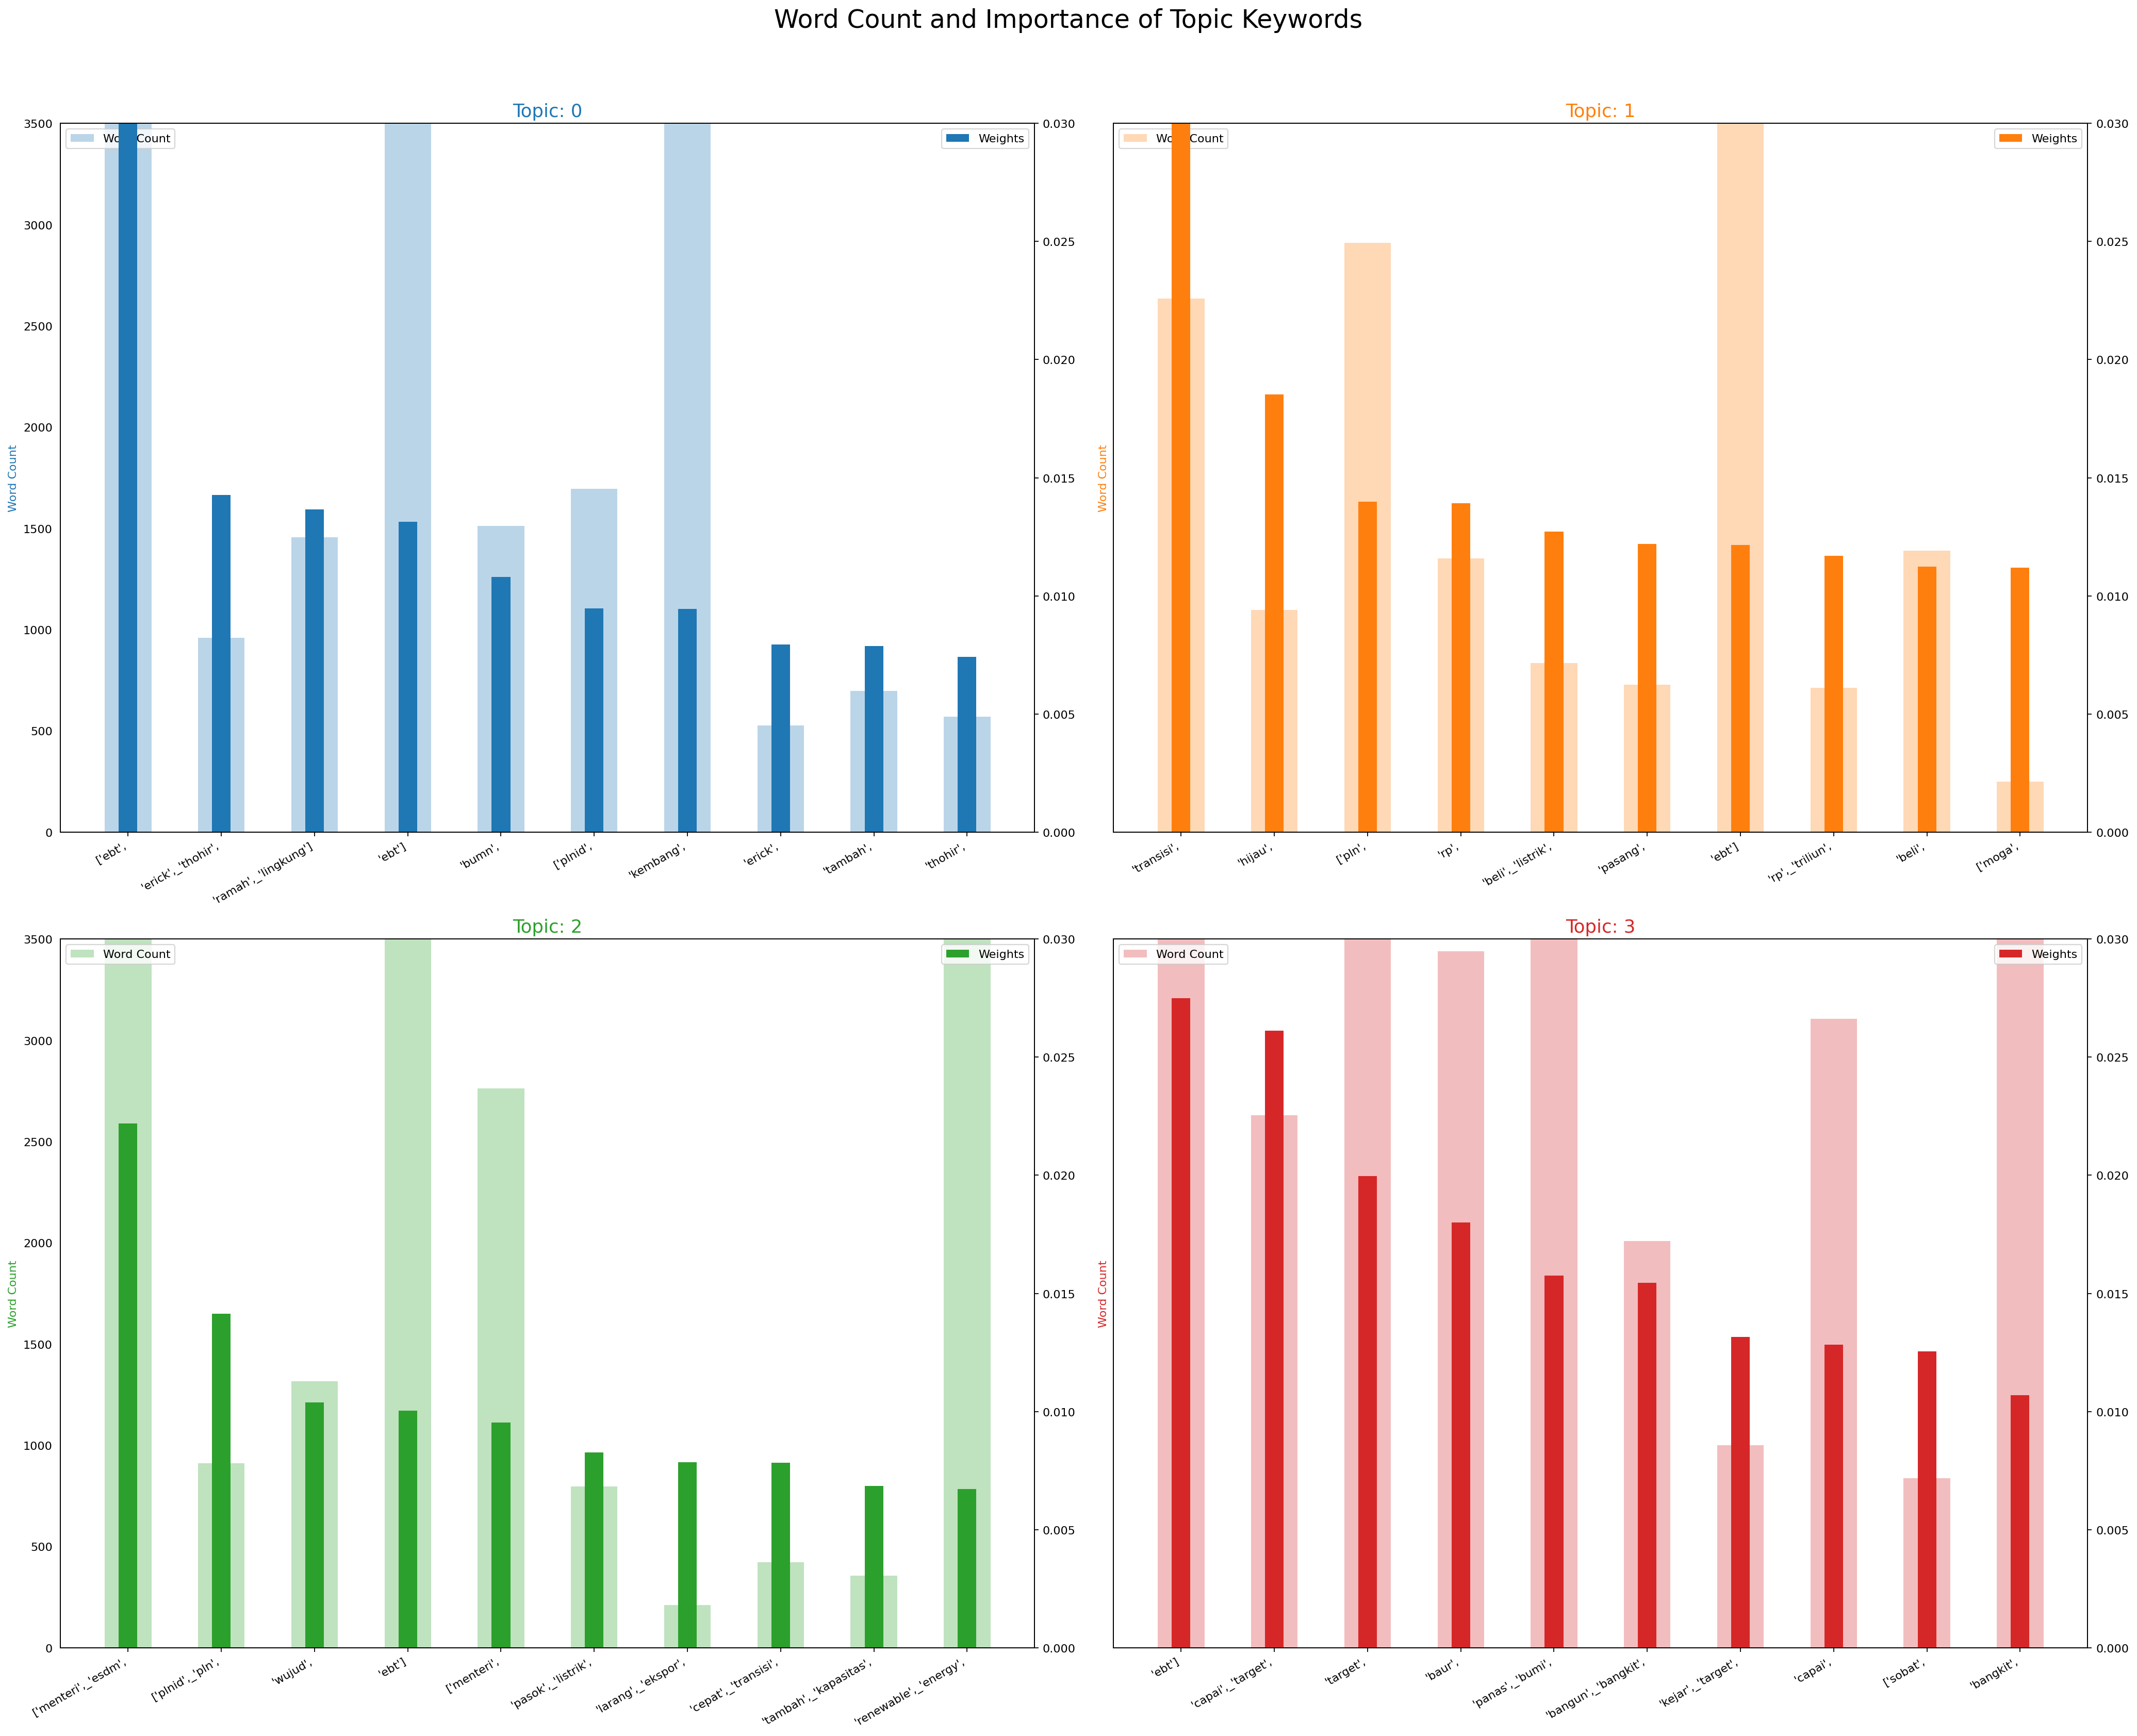

In [73]:
import seaborn as sns
import matplotlib.colors as mcolors
from collections import Counter
topics = model.show_topics(formatted=False)
data_flat = [w for w_list in text_list for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(26,20), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()